In [13]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
from MCForecastTools import MCSimulation

%matplotlib inline

In [14]:
# Reading hash returns
global_hash_path = Path("global_hash_rates.csv")
hash_df = pd.read_csv(global_hash_path, index_col="date", parse_dates=True, infer_datetime_format=True)
hash_df.head()

/var/folders/0y/0ryw5t697kx0w5g519j9r8840000gn/T/ipykernel_60982/2504355210.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  hash_df = pd.read_csv(global_hash_path, index_col="date", parse_dates=True, infer_datetime_format=True)


,country,monthly_hashrate_%,monthly_absolute_hashrate_EH/S
date,,,
2019-09-01,Mainland China,75.53%,66.76
2019-09-01,Other,6.1%,5.39
2019-09-01,Russian Federation,5.93%,5.24
2019-09-01,United States,4.06%,3.59
2019-09-01,Malaysia,3.25%,2.88


In [15]:
# Cleaning the data
hash_df.isnull().sum()
hash_df.isnull().sum() / len(hash_df) * 100
hash_df.dropna(inplace=True)
hash_df.sort_index(inplace=True)
hash_df.head()

,country,monthly_hashrate_%,monthly_absolute_hashrate_EH/S
date,,,
2019-09-01,Mainland China,75.53%,66.76
2019-09-01,Other,6.1%,5.39
2019-09-01,Russian Federation,5.93%,5.24
2019-09-01,United States,4.06%,3.59
2019-09-01,Malaysia,3.25%,2.88


In [16]:
# Cleaning the data / drop monthly hash rate column
hash_df = hash_df.drop(columns=["monthly_hashrate_%"])
hash_df.head(10)

,country,monthly_absolute_hashrate_EH/S
date,,
2019-09-01,Mainland China,66.76
2019-09-01,Other,5.39
2019-09-01,Russian Federation,5.24
2019-09-01,United States,3.59
2019-09-01,Malaysia,2.88
2019-09-01,"Iran, Islamic Rep.",1.54
2019-09-01,Kazakhstan,1.26
2019-09-01,Canada,0.94
2019-09-01,Germany *,0.80


In [17]:
# Cleaning the data specific to country
# Mainland China
hash_df_China = hash_df.loc[hash_df['country'] == 'Mainland China'].copy()
hash_df_China.head()
# Other
hash_df_Other = hash_df.loc[hash_df['country'] == 'Other'].copy()
hash_df_Other.head(10)
# Russian Federation
hash_df_Russia = hash_df.loc[hash_df['country'] == 'Russian Federation'].copy()
hash_df_Russia.head(10)
# United States
hash_df_US = hash_df.loc[hash_df['country'] == 'United States'].copy()
hash_df_US.head(10)
# Malaysia
hash_df_Malaysia = hash_df.loc[hash_df['country'] == 'Malaysia'].copy()
hash_df_Malaysia.head(10)
# Iran
hash_df_Iran = hash_df.loc[hash_df['country'] == 'Iran, Islamic Rep.'].copy()
hash_df_Iran.head(10)
# Kazakhstan
hash_df_Kazakhstan = hash_df.loc[hash_df['country'] == 'Kazakhstan'].copy()
hash_df_Kazakhstan.head(10)
# Kazakhstan
hash_df_Canada = hash_df.loc[hash_df['country'] == 'Canada'].copy()
hash_df_Canada.head(10)
# Germany
hash_df_Germany = hash_df.loc[hash_df['country'] == 'Germany *'].copy()
hash_df_Germany.head(10)
# Germany
hash_df_Ireland = hash_df.loc[hash_df['country'] == 'Ireland *'].copy()
hash_df_Ireland.fillna(0, inplace=True)
#hash_df_Ireland_returns = hash_df_Ireland.pct_change(['monthly_absolute_hashrate_EH/S'])
hash_df_Ireland_returns = hash_df_Ireland.iloc[:,1].pct_change()
hash_df_Ireland_returns.head(100)

date
2019-09-01          NaN
2019-10-01          NaN
2019-11-01          NaN
2019-12-01          NaN
2020-01-01          NaN
2020-02-01          NaN
2020-03-01          NaN
2020-04-01          NaN
2020-05-01          NaN
2020-06-01          inf
2020-07-01    -0.500000
2020-08-01     3.000000
2020-09-01    46.750000
2020-10-01     0.732984
2020-11-01     0.196375
2020-12-01     0.063131
2021-01-01    -0.083135
2021-02-01    -0.163212
2021-03-01     0.024768
2021-04-01     0.078550
2021-05-01     0.014006
2021-06-01    -0.052486
2021-07-01     0.481050
2021-08-01     0.112205
2021-09-01    -0.479646
2021-10-01     0.180272
2021-11-01    -0.002882
2021-12-01     0.028902
2022-01-01     0.036517
Name: monthly_absolute_hashrate_EH/S, dtype: float64

/Users/russellgould/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


<Axes: xlabel='date'>

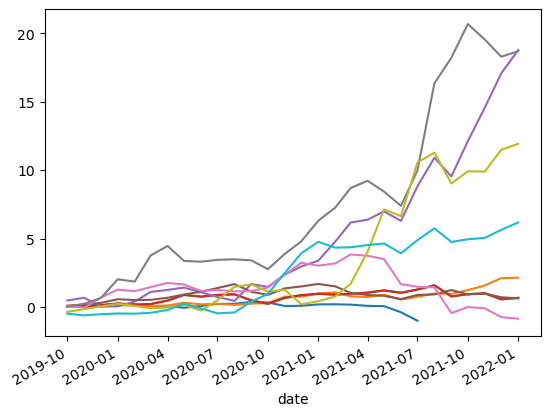

In [18]:
#Calculate China daily returns and cumulative returns
China_returns = hash_df_China.iloc[:,1].pct_change()
China_returns.dropna(inplace=True)
China_returns.head(20)
#Calculate cumulative returns
cumulative_China_returns = (1 + China_returns).cumprod() - 1
cumulative_China_returns.plot()

#Calculate Other daily returns and cumulative returns
Other_returns = hash_df_Other.iloc[:,1].pct_change()
Other_returns.dropna(inplace=True)
Other_returns.head(20)
#Calculate cumulative returns
cumulative_Other_returns = (1 + Other_returns).cumprod() - 1
cumulative_Other_returns.plot()

#Calculate Russia daily returns and cumulative returns
Russia_returns = hash_df_Russia.iloc[:,1].pct_change()
Russia_returns.dropna(inplace=True)
Russia_returns.head(20)
#Calculate cumulative returns
cumulative_Russia_returns = (1 + Russia_returns).cumprod() - 1
cumulative_Russia_returns.plot()

#Calculate Russia daily returns and cumulative returns
Russia_returns = hash_df_Russia.iloc[:,1].pct_change()
Russia_returns.dropna(inplace=True)
Russia_returns.head(20)
#Calculate cumulative returns
cumulative_Russia_returns = (1 + Russia_returns).cumprod() - 1
cumulative_Russia_returns.plot()

#Calculate US daily returns and cumulative returns
US_returns = hash_df_US.iloc[:,1].pct_change()
US_returns.dropna(inplace=True)
US_returns.head(20)
#Calculate cumulative returns
cumulative_US_returns = (1 + US_returns).cumprod() - 1
cumulative_US_returns.plot()

#Calculate Malaysia daily returns and cumulative returns
Malaysia_returns = hash_df_Malaysia.iloc[:,1].pct_change()
Malaysia_returns.dropna(inplace=True)
Malaysia_returns.head(20)
#Calculate cumulative returns
cumulative_Malaysia_returns = (1 + Malaysia_returns).cumprod() - 1
cumulative_Malaysia_returns.plot()

#Calculate Iran daily returns and cumulative returns
Iran_returns = hash_df_Iran.iloc[:,1].pct_change()
Iran_returns.dropna(inplace=True)
Iran_returns.head(20)
#Calculate cumulative returns
cumulative_Iran_returns = (1 + Iran_returns).cumprod() - 1
cumulative_Iran_returns.plot()

#Calculate Kazakhstan daily returns and cumulative returns
Kazakhstan_returns = hash_df_Kazakhstan.iloc[:,1].pct_change()
Kazakhstan_returns.dropna(inplace=True)
Kazakhstan_returns.head(20)
#Calculate cumulative returns
cumulative_Kazakhstan_returns = (1 + Kazakhstan_returns).cumprod() - 1
cumulative_Kazakhstan_returns.plot()

#Calculate Canada daily returns and cumulative returns
Canada_returns = hash_df_Canada.iloc[:,1].pct_change()
Canada_returns.dropna(inplace=True)
Canada_returns.head(20)
#Calculate cumulative returns
cumulative_Canada_returns = (1 + Canada_returns).cumprod() - 1
cumulative_Canada_returns.plot()

#Calculate Germany daily returns and cumulative returns
Germany_returns = hash_df_Germany.iloc[:,1].pct_change()
Germany_returns.dropna(inplace=True)
Germany_returns.head(20)
#Calculate cumulative returns
cumulative_Germany_returns = (1 + Germany_returns).cumprod() - 1
cumulative_Germany_returns.plot()

#Calculate Ireland daily returns and cumulative returns
Ireland_returns = hash_df_Ireland.iloc[:,1].pct_change()
Ireland_returns.dropna(inplace=True)
Ireland_returns.head(20)
#Calculate cumulative returns
cumulative_Ireland_returns = (1 + Ireland_returns).cumprod() - 1
cumulative_Ireland_returns.plot()


In [19]:
#New Data Frame / Cumulative returns
combined_df = pd.concat([China_returns, Other_returns, Russia_returns, US_returns, Malaysia_returns, Iran_returns, Kazakhstan_returns, Canada_returns, Germany_returns, Ireland_returns], axis="columns", join="outer")
countries = ['China', 'Other', 'Russia', 'US', 'Malaysia', 'Iran', 'Kazakhstan', 'Canada', 'Germany', 'Ireland']
combined_df.columns = countries
combined_df.head(40)

,China,Other,Russia,US,Malaysia,Iran,Kazakhstan,Canada,Germany,Ireland
date,,,,,,,,,,
2019-10-01,0.063960,0.109462,0.062977,0.476323,0.076389,0.090909,0.031746,-0.351064,-0.487500,NaN
2019-11-01,-0.067859,0.020067,0.026930,0.135849,0.080645,-0.130952,0.200000,0.295082,-0.243902,NaN
2019-12-01,0.058148,-0.029508,0.038462,-0.387043,0.116418,0.773973,0.333333,0.240506,0.225806,NaN
2020-01-01,0.133457,0.027027,0.111111,0.018970,0.208556,0.351351,0.831731,0.183673,0.105263,NaN
2020-02-01,0.014860,-0.016447,-0.069697,0.335106,-0.037611,-0.051429,-0.055118,-0.120690,-0.023810,NaN
2020-03-01,-0.110932,-0.031773,0.037459,0.503984,0.009195,0.135542,0.666667,-0.166667,0.121951,NaN
2020-04-01,0.007537,0.029361,0.207221,0.068874,0.097950,0.127321,0.146667,0.070588,0.369565,NaN
2020-05-01,-0.128827,0.192953,0.283485,0.076828,0.143154,-0.042353,-0.200581,0.186813,0.587302,NaN
2020-06-01,0.147877,-0.095640,-0.066869,-0.140391,0.107078,-0.176904,-0.012727,-0.351852,-0.280000,inf


In [27]:
combined_df_2 = pd.concat([hash_df_China, hash_df_Other, hash_df_Russia, hash_df_US, hash_df_Malaysia, hash_df_Iran, hash_df_Kazakhstan, hash_df_Canada, hash_df_Germany, hash_df_Ireland], axis="columns", join="outer")
combined_df_2.head(40)

,country,monthly_absolute_hashrate_EH/S,country,monthly_absolute_hashrate_EH/S,country,monthly_absolute_hashrate_EH/S,country,monthly_absolute_hashrate_EH/S,country,monthly_absolute_hashrate_EH/S,country,monthly_absolute_hashrate_EH/S,country,monthly_absolute_hashrate_EH/S,country,monthly_absolute_hashrate_EH/S,country,monthly_absolute_hashrate_EH/S,country,monthly_absolute_hashrate_EH/S
date,,,,,,,,,,,,,,,,,,,,
2019-09-01,Mainland China,66.76,Other,5.39,Russian Federation,5.24,United States,3.59,Malaysia,2.88,"Iran, Islamic Rep.",1.54,Kazakhstan,1.26,Canada,0.94,Germany *,0.80,Ireland *,0.00
2019-10-01,Mainland China,71.03,Other,5.98,Russian Federation,5.57,United States,5.30,Malaysia,3.10,"Iran, Islamic Rep.",1.68,Kazakhstan,1.30,Canada,0.61,Germany *,0.41,Ireland *,0.00
2019-11-01,Mainland China,66.21,Other,6.10,Russian Federation,5.72,United States,6.02,Malaysia,3.35,"Iran, Islamic Rep.",1.46,Kazakhstan,1.56,Canada,0.79,Germany *,0.31,Ireland *,0.00
2019-12-01,Mainland China,70.06,Other,5.92,Russian Federation,5.94,United States,3.69,Malaysia,3.74,"Iran, Islamic Rep.",2.59,Kazakhstan,2.08,Canada,0.98,Germany *,0.38,Ireland *,0.00
2020-01-01,Mainland China,79.41,Other,6.08,Russian Federation,6.60,United States,3.76,Malaysia,4.52,"Iran, Islamic Rep.",3.50,Kazakhstan,3.81,Canada,1.16,Germany *,0.42,Ireland *,0.00
2020-02-01,Mainland China,80.59,Other,5.98,Russian Federation,6.14,United States,5.02,Malaysia,4.35,"Iran, Islamic Rep.",3.32,Kazakhstan,3.60,Canada,1.02,Germany *,0.41,Ireland *,0.00
2020-03-01,Mainland China,71.65,Other,5.79,Russian Federation,6.37,United States,7.55,Malaysia,4.39,"Iran, Islamic Rep.",3.77,Kazakhstan,6.00,Canada,0.85,Germany *,0.46,Ireland *,0.00
2020-04-01,Mainland China,72.19,Other,5.96,Russian Federation,7.69,United States,8.07,Malaysia,4.82,"Iran, Islamic Rep.",4.25,Kazakhstan,6.88,Canada,0.91,Germany *,0.63,Ireland *,0.00
2020-05-01,Mainland China,62.89,Other,7.11,Russian Federation,9.87,United States,8.69,Malaysia,5.51,"Iran, Islamic Rep.",4.07,Kazakhstan,5.50,Canada,1.08,Germany *,1.00,Ireland *,0.00


In [21]:
combined_df.replace('NaN',0)
combined_df.replace('inf',0)
combined_df.head()

,China,Other,Russia,US,Malaysia,Iran,Kazakhstan,Canada,Germany,Ireland
date,,,,,,,,,,
2019-10-01,0.063960,0.109462,0.062977,0.476323,0.076389,0.090909,0.031746,-0.351064,-0.487500,NaN
2019-11-01,-0.067859,0.020067,0.026930,0.135849,0.080645,-0.130952,0.200000,0.295082,-0.243902,NaN
2019-12-01,0.058148,-0.029508,0.038462,-0.387043,0.116418,0.773973,0.333333,0.240506,0.225806,NaN
2020-01-01,0.133457,0.027027,0.111111,0.018970,0.208556,0.351351,0.831731,0.183673,0.105263,NaN
2020-02-01,0.014860,-0.016447,-0.069697,0.335106,-0.037611,-0.051429,-0.055118,-0.120690,-0.023810,NaN


In [24]:
dfs_to_concat = [
    China_returns, Other_returns, Russia_returns, US_returns, Malaysia_returns,
    Iran_returns, Kazakhstan_returns, Canada_returns, Germany_returns, Ireland_returns
]
country_names = [
    'China', 'Other', 'Russia', 'US', 'Malaysia',
    'Iran', 'Kazakhstan', 'Canada', 'Germany', 'Ireland'
]
multi_index = pd.MultiIndex.from_product([country_names, ['close']], names=['Country', 'Data'])
combined_df = pd.concat(dfs_to_concat, axis="columns")
combined_df.columns = multi_index

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
count           1.000000e+02
mean            5.025266e+14
std             5.030756e+15
min            -6.794166e+13
25%            -1.320727e+08
50%            -3.838222e+02
75%             1.755181e+08
max             5.030696e+16
95% CI Lower   -8.412167e+11
95% CI Upper    2.677933e+12
Name: 36, dtype: float64


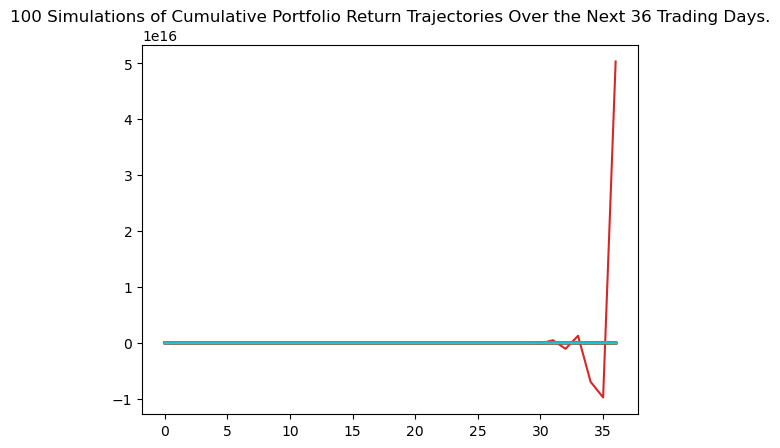

In [25]:
# Configuring a Monte Carlo simulation to forecast 35 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = combined_df,
    weights = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
    num_simulation = 100,
    num_trading_days = 12*3
)
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()
# Save the plot for future usage
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

In [26]:
hash_df_China.head()

,country,monthly_absolute_hashrate_EH/S
date,,
2019-09-01,Mainland China,66.76
2019-10-01,Mainland China,71.03
2019-11-01,Mainland China,66.21
2019-12-01,Mainland China,70.06
2020-01-01,Mainland China,79.41
